## Self Coded NN

In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
class NeuralNet:
    
    def __init__(self, input_size, layers, output_size):
        np.random.seed(0)
        self.le = LabelEncoder()
        
        model = {}
        
        #First Layer
        model['W1'] = np.random.randn(input_size, layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third Layer
        model['W3'] = np.random.randn(layers[1], output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def softmax(self, a):
        hx = np.exp(a)
        ans = hx/np.sum(hx, axis=1, keepdims=True)
        return ans
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def forward(self, x):
        z1 = np.dot(x, self.model['W1']) + self.model['b1']
        a1 = self.sigmoid(z1)
        
        z2 = np.dot(a1, self.model['W2']) + self.model['b2']
        a2 = self.sigmoid(z2)
        
        z3 = np.dot(a2, self.model['W3']) + self.model['b3']
        y_ = self.softmax(z3)
        
        self.activations = (a1, a2, y_)
        return y_
        
    def back_prop(self, x, y, learning_rate = 0.002):
        
        m = x.shape[0]
        a1,a2,y_ = self.activations
        
        delta3 = y_ - y 
        dw3 = np.dot(a2.T, delta3)
        db3 = np.sum(delta3, axis=0)/float(m)
        
        delta2 = a2*(1-a2)*np.dot(delta3, self.model['W3'].T)
        dw2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis = 0)/float(m)
        
        delta1 = a1*(1-a1)*np.dot(delta2, self.model['W2'].T)
        dw1 = np.dot(x.T, delta1)
        db1 = np.sum(delta1, axis = 0)/float(m)
        
        #Update model params
        
        self.model['W1'] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1
        self.model['W2'] -= learning_rate*dw2
        self.model['b2'] -= learning_rate*db2
        self.model['W3'] -= learning_rate*dw3
        self.model['b3'] -= learning_rate*db3
        
    def predict(self, x):
        y_out = self.forward(x)
        y = np.argmax(y_out, axis=1)
        return self.le.inverse_transform(y)
        
    def one_hot(self, y, depth):
        m = y.shape[0]
        y_oht = np.zeros((m, depth))
        y_oht[np.arange(m), y] = 1
        return y_oht
        
    def summary(self):
        print("W1", self.model['W1'].shape)
        
        print("W2", self.model['W2'].shape)
        
        print("W3", self.model['W3'].shape)
        
    def loss(self, y_oht, p):
        return -np.sum(y_oht*np.log(p))/y_oht.shape[0]
        
    def train(self, X, Y, batch_size = 64, num_epochs = 50 ,learning_rate = 0.003, logs = True):
        training_loss = []
        accuracy = []
        Y_ = self.le.fit_transform(Y)
        Y_OHT = self.one_hot(Y_, self.le.classes_.shape[0])
        
        indices = np.arange(0, X.shape[0], batch_size)
        
        for _ in range(num_epochs):
            np.random.shuffle(indices)
            for j in range(indices.shape[0]):
                x_batch = X[indices[j]:min(indices[j]+batch_size, X.shape[0])]
                y_batch = Y_OHT[indices[j]:min(indices[j]+batch_size, X.shape[0])]
                Y_ = self.forward(x_batch)
                self.back_prop(x_batch, y_batch, learning_rate)
            l = self.loss(Y_OHT, self.forward(X))
            training_loss.append(l)
            Y_preds = self.predict(X)
            acc = np.mean(Y_preds == Y)
            accuracy.append(acc)
            if(logs):
                print("Epoch %d - Loss %0.3f, Accuracy %0.3f"%(_+1, l, acc))
        return training_loss, accuracy
        

In [3]:
df_train = pd.read_csv('./mnist_train.csv')
df_test = pd.read_csv('./mnist_test.csv')
df_train.shape, df_test.shape

((59999, 785), (9999, 785))

In [4]:
data_train = np.array(df_train)
data_test = np.array(df_test)

In [5]:
X_train = data_train[:,1:]/255.0
Y_train = data_train[:,0]
X_test = data_test[:,1:]/255.0
Y_test = data_test[:,0]

In [6]:
nn = NeuralNet(X_test.shape[1], [256, 64], 10)

In [7]:
nn.summary()

W1 (784, 256)
W2 (256, 64)
W3 (64, 10)


In [8]:
training_losses, accuracy = nn.train(X_train, Y_train, batch_size=256)

/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 1 - Loss 0.641, Accuracy 0.797


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 2 - Loss 0.483, Accuracy 0.849


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 3 - Loss 0.409, Accuracy 0.874


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 4 - Loss 0.361, Accuracy 0.889


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 5 - Loss 0.315, Accuracy 0.904


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 6 - Loss 0.290, Accuracy 0.912


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 7 - Loss 0.275, Accuracy 0.917


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 8 - Loss 0.255, Accuracy 0.924


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 9 - Loss 0.234, Accuracy 0.931


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 10 - Loss 0.223, Accuracy 0.935


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 11 - Loss 0.210, Accuracy 0.939


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 12 - Loss 0.198, Accuracy 0.944


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 13 - Loss 0.193, Accuracy 0.943


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 14 - Loss 0.180, Accuracy 0.948


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 15 - Loss 0.171, Accuracy 0.951


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 16 - Loss 0.165, Accuracy 0.954


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 17 - Loss 0.159, Accuracy 0.955


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 18 - Loss 0.150, Accuracy 0.958


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 19 - Loss 0.145, Accuracy 0.959


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 20 - Loss 0.138, Accuracy 0.961


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 21 - Loss 0.134, Accuracy 0.963


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 22 - Loss 0.128, Accuracy 0.965


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 23 - Loss 0.123, Accuracy 0.966


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 24 - Loss 0.123, Accuracy 0.966


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 25 - Loss 0.117, Accuracy 0.968


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 26 - Loss 0.111, Accuracy 0.970


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 27 - Loss 0.108, Accuracy 0.971


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 28 - Loss 0.104, Accuracy 0.972


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 29 - Loss 0.098, Accuracy 0.974


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 30 - Loss 0.096, Accuracy 0.975


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 31 - Loss 0.092, Accuracy 0.976


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 32 - Loss 0.089, Accuracy 0.977


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 33 - Loss 0.086, Accuracy 0.977


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 34 - Loss 0.083, Accuracy 0.979


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 35 - Loss 0.080, Accuracy 0.980


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 36 - Loss 0.078, Accuracy 0.980


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 37 - Loss 0.076, Accuracy 0.981


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 38 - Loss 0.074, Accuracy 0.981


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 39 - Loss 0.070, Accuracy 0.983


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 40 - Loss 0.068, Accuracy 0.983


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 41 - Loss 0.066, Accuracy 0.984


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 42 - Loss 0.064, Accuracy 0.985


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 43 - Loss 0.063, Accuracy 0.985


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 44 - Loss 0.061, Accuracy 0.986


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 45 - Loss 0.058, Accuracy 0.986


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 46 - Loss 0.057, Accuracy 0.987


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 47 - Loss 0.055, Accuracy 0.987


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 48 - Loss 0.054, Accuracy 0.988


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 49 - Loss 0.052, Accuracy 0.988
Epoch 50 - Loss 0.051, Accuracy 0.989


/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [9]:
Y_test_preds = nn.predict(X_test)

/Users/hardik/Virtualenvs/mlcb/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [10]:
print('Testing Accuracy : %0.2f'%(np.mean(Y_test == Y_test_preds)*100))

Testing Accuracy : 94.15


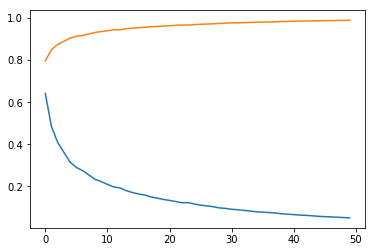

In [11]:
plt.plot(training_losses)
plt.plot(accuracy)
plt.show()

## Using Keras

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

Using TensorFlow backend.


In [13]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total para

In [16]:
Y_OHT_train = np_utils.to_categorical(Y_train)

In [17]:
hist = model.fit(X_train, Y_OHT_train, batch_size=256, epochs=50)

Epoch 1/50
59999/59999 [==============================] - 4s 68us/step - loss: 0.6594 - acc: 0.7952
Epoch 2/50
59999/59999 [==============================] - 3s 56us/step - loss: 0.2465 - acc: 0.9334
Epoch 3/50
59999/59999 [==============================] - 3s 53us/step - loss: 0.1804 - acc: 0.9515
Epoch 4/50
59999/59999 [==============================] - 3s 53us/step - loss: 0.1459 - acc: 0.9614
Epoch 5/50
59999/59999 [==============================] - 3s 52us/step - loss: 0.1233 - acc: 0.9669
Epoch 6/50
59999/59999 [==============================] - 3s 53us/step - loss: 0.1097 - acc: 0.9704
Epoch 7/50
59999/59999 [==============================] - 3s 52us/step - loss: 0.0966 - acc: 0.9740
Epoch 8/50
59999/59999 [==============================] - 3s 55us/step - loss: 0.0864 - acc: 0.9769
Epoch 9/50
59999/59999 [==============================] - 3s 52us/step - loss: 0.0788 - acc: 0.9785
Epoch 10/50
59999/59999 [==============================] - 3s 56us/step - loss: 0.0715 - acc: 0.9805

In [18]:
y_test_preds = model.predict_classes(X_test)

In [19]:
print('Testing Accuracy : %0.2f'%(np.mean(Y_test == y_test_preds)*100))

Testing Accuracy : 98.31


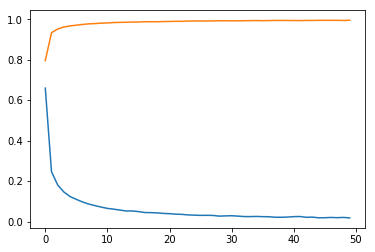

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['acc'])
plt.show()